<a href="https://colab.research.google.com/github/rayssasnt/ml-classificacao-simples/blob/main/Machine_Learning_Classifica%C3%A7%C3%A3o_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# features [1 sim, 0 nao]
# pelo longo?
# perna curta?
# faz auau?

porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

In [ ]:
# 1 -> porco,
# 0 -> cachorro
dados = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
classes = [1, 1, 1, 0, 0, 0]

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(dados,classes)
# treinar baseado nos dados e classes

LinearSVC()

In [ ]:
animal_misterioso = [0,1,1] # pelo curto , perna_curta, faz auau
model.predict([animal_misterioso])


array([0])

# Teste

In [ ]:
misterio1 = [1, 1, 1]
misterio2 = [1, 1, 0]
misterio3 = [0, 1, 1]

testes = [misterio1, misterio2, misterio3]
previsoes = model.predict(testes)

In [ ]:
testes_resposta = [0,1,1]

In [ ]:
acertos = (previsoes == testes_resposta).sum()
# 66%
total =len(testes)
taxa_acerto = acertos / total * 100

f'Acurácia: {taxa_acerto:.2f}% de acerto'

'Acurácia: 66.67% de acerto'

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
taxa_acerto = accuracy_score(testes_resposta,previsoes)*100
f'Acurácia: {taxa_acerto:.2f}% de acerto'

'Acurácia: 66.67% de acerto'

# Parte 2

In [ ]:
url_tracking = 'https://gist.githubusercontent.com/guilhermesilveira/b9dd8e4b62b9e22ebcb9c8e89c271de4/raw/c69ec4b708fba03c445397b6a361db4345c83d7a/tracking.csv'
url_projetos = 'https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv'

1 > Sim

0 > Não

In [ ]:
df_tracking = pd.read_csv(url_tracking,sep=',')
df_tracking.head()

,inicial,palestras,contato,comprou,patrocinio
0,1,1,0,0,0
1,1,1,0,0,0
2,1,1,0,0,0
3,1,1,0,0,0
4,1,1,0,0,0


In [ ]:
y = df_tracking["comprou"]
x = df_tracking[["inicial", "palestras",	"contato",	"patrocinio"]]

treino_x = x[:75]
treino_y = y[:75]

teste_x = x[75:]
teste_y = y[75:]

print(f"Treinaremos com {len(treino_x)} elementos")
print(f"Testaremos com {len(teste_x)} elementos")

Treinaremos com 75 elementos
Testaremos com 24 elementos


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

A acurácia foi de 95.83%


In [ ]:
from sklearn.model_selection import train_test_split

SEED = 478

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, stratify=y)

print(f"Treinaremos com {len(treino_x)} elementos")
print(f"Testaremos com {len(teste_x)} elementos")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 74 elementos
Testaremos com 25 elementos
A acurácia foi de 96.00%


In [ ]:
# proporção de teste
teste_y.value_counts()

,count
comprou,
0,17
1,8


In [ ]:
# e de treio
treino_y.value_counts()

,count
comprou,
0,49
1,25


In [ ]:
# 0 > não finalizado
# 1 > finalizado
# site de projetos que a ser realizado

In [ ]:
df_projetos = pd.read_csv(url_projetos, sep=',')
df_projetos.head()

,nao_finalizado,horas_esperadas,preco
0,0,75.0,6985.000000
1,1,0.0,4325.293458
2,0,87.0,14205.000000
3,1,13.0,100.000000
4,0,2.0,202.000000


In [ ]:
df_projetos["finalizado"] = df_projetos["nao_finalizado"].map({1: 0, 0: 1})
df_projetos.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.000000,1
1,1,0.0,4325.293458,0
2,0,87.0,14205.000000,1
3,1,13.0,100.000000,0
4,0,2.0,202.000000,1


In [ ]:
import seaborn as sns

<Axes: xlabel='horas_esperadas', ylabel='preco'>

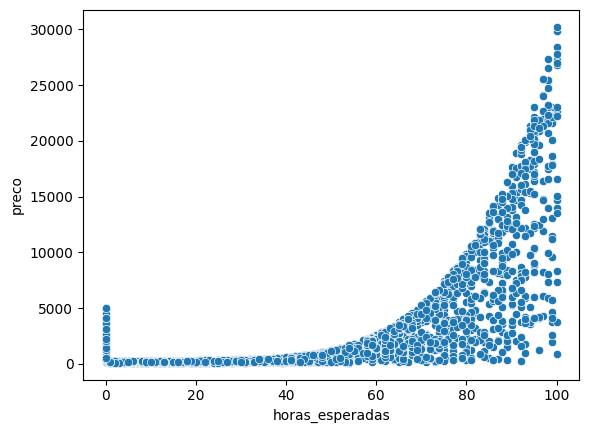

In [ ]:
sns.scatterplot(x="horas_esperadas", y="preco", data=df_projetos)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

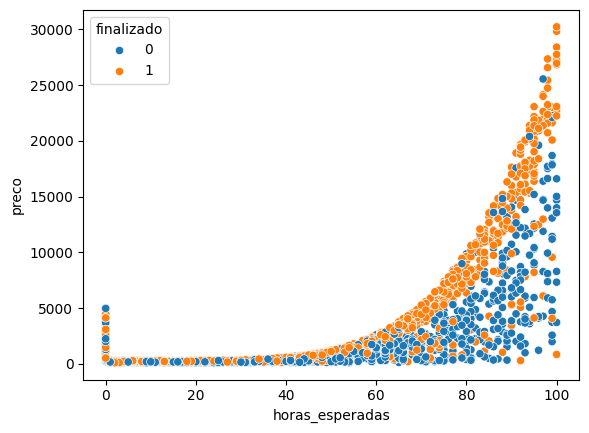

In [ ]:
sns.scatterplot(x="horas_esperadas", y="preco", data=df_projetos, hue="finalizado")

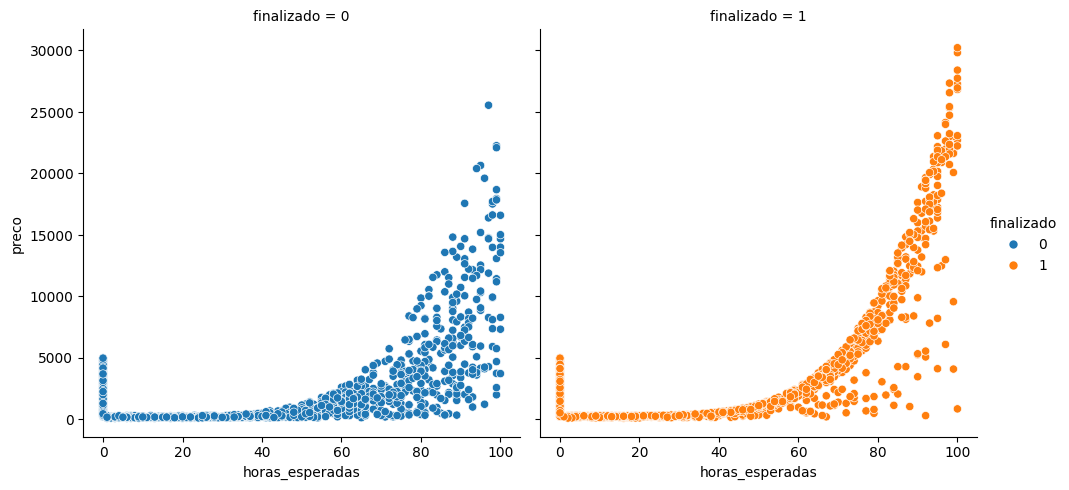

In [ ]:
sns.relplot(x="horas_esperadas", y="preco", data=df_projetos, hue="finalizado", col="finalizado")

In [ ]:
 # jogar fora as linhas com horas_esperadas = 0
df_projetos = df_projetos.query("horas_esperadas > 0")
df_projetos.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.0,1
2,0,87.0,14205.0,1
3,1,13.0,100.0,0
4,0,2.0,202.0,1
5,0,49.0,1096.0,1


In [ ]:
x = df_projetos[['horas_esperadas','preco']]
y = df_projetos[['finalizado']]

In [ ]:
SEED = 85

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, stratify=y)

print(f"Treinaremos com {len(treino_x)} elementos")
print(f"Testaremos com {len(teste_x)} elementos")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 1617 elementos
Testaremos com 540 elementos
A acurácia foi de 56.85%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
x_min = teste_x["horas_esperadas"].min()
x_max = teste_x["horas_esperadas"].max()
y_min = teste_x["preco"].min()
y_max = teste_x["preco"].max()

In [ ]:
print(f"x_min: {x_min}")
print(f"x_max: {x_max}")
print(f"y_min: {y_min}")
print(f"y_max: {y_max}")

x_min: 1.0
x_max: 100.0
y_min: 101.0
y_max: 29820.0


In [ ]:
import numpy as np

pixels = 100

In [ ]:
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [ ]:
xx , yy = np.meshgrid(eixo_x,eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]
# cada pixel em um grid de 100%

In [ ]:
Z = modelo.predict(pontos)

Z.reshape(xx.shape)

Z

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([1, 0, 0, ..., 1, 1, 1])

# SVC

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

A acurácia foi de 56.85%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import train_test_split

SEED = 478

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, stratify=y)

print(f"Treinaremos com {len(treino_x)} elementos")
print(f"Testaremos com {len(teste_x)} elementos")

modelo = SVC(gamma = 'auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Treinaremos com 1617 elementos
Testaremos com 540 elementos
A acurácia foi de 60.74%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


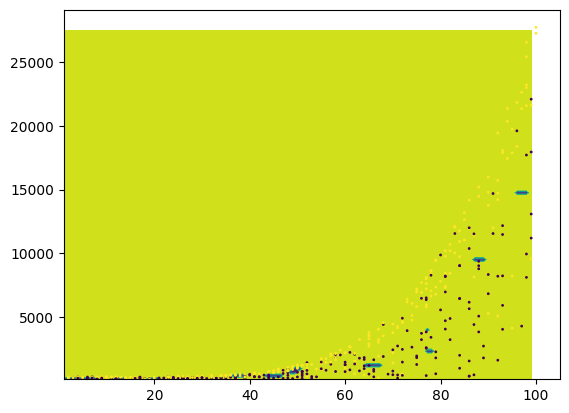

In [ ]:
x_min = teste_x["horas_esperadas"].min()
x_max = teste_x["horas_esperadas"].max()
y_min = teste_x["preco"].min()
y_max = teste_x["preco"].max()

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z)
plt.scatter(teste_x["horas_esperadas"], teste_x["preco"], c=teste_y.values.ravel(), s=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 1617
Testaremos com 540


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A acurácia foi de 68.52%


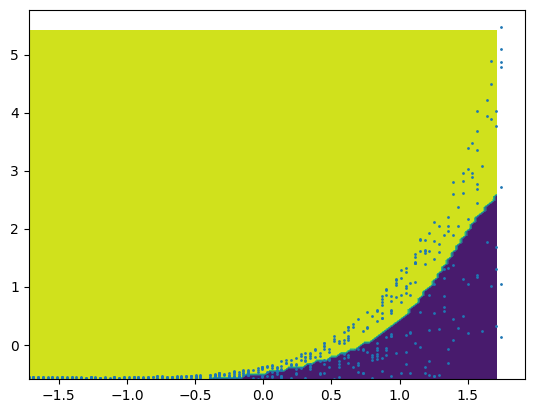

In [ ]:
data_col1 = teste_x[:, 0]
data_col2 = teste_x[:, 1]

x_min = data_col1.min()
x_max = data_col1.max()
y_min = data_col2.min()
y_max = data_col2.max()

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z)
plt.scatter(data_col1, data_col2, s=1)

# Novo df

In [ ]:
import pandas as pd

dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/dd7ba8142321c2c8aaa0ddd6c8862fcc/raw/e694a9b43bae4d52b6c990a5654a193c3f870750/precos.csv")
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [ ]:
dados['km_ano']= dados['milhas_por_ano'] * 160934
dados

,milhas_por_ano,ano_do_modelo,preco,vendido,km_ano
0,21801,2000,30941.02,1,3508522134
1,7843,1998,40557.96,1,1262205362
2,7109,2006,89627.50,0,1144079806
3,26823,2015,95276.14,0,4316732682
4,7935,2014,117384.68,1,1277011290
...,...,...,...,...,...
9995,15572,2006,97112.86,0,2506064248
9996,13246,2002,107424.63,1,2131731764
9997,13018,2014,93856.99,0,2095038812
9998,10464,2011,51250.57,1,1684013376


In [ ]:
from datetime import datetime

dados['idade'] = datetime.today().year - dados['ano_do_modelo']

dados

,milhas_por_ano,ano_do_modelo,preco,vendido,km_ano,idade
0,21801,2000,30941.02,1,3508522134,26
1,7843,1998,40557.96,1,1262205362,28
2,7109,2006,89627.50,0,1144079806,20
3,26823,2015,95276.14,0,4316732682,11
4,7935,2014,117384.68,1,1277011290,12
...,...,...,...,...,...,...
9995,15572,2006,97112.86,0,2506064248,20
9996,13246,2002,107424.63,1,2131731764,24
9997,13018,2014,93856.99,0,2095038812,12
9998,10464,2011,51250.57,1,1684013376,15


In [ ]:
dados.drop(['ano_do_modelo','milhas_por_ano'], axis=1,inplace=True)
dados

,preco,vendido,km_ano,idade
0,30941.02,1,3508522134,26
1,40557.96,1,1262205362,28
2,89627.50,0,1144079806,20
3,95276.14,0,4316732682,11
4,117384.68,1,1277011290,12
...,...,...,...,...
9995,97112.86,0,2506064248,20
9996,107424.63,1,2131731764,24
9997,93856.99,0,2095038812,12
9998,51250.57,1,1684013376,15


In [ ]:
x = dados[["preco", "idade", "km_ano"]]
y = dados["vendido"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")


scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 75.92%


# DummyClassifier

In [ ]:
from sklearn.dummy import DummyClassifier

SEED = 75

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")


scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


classificador = DummyClassifier(strategy = 'stratified')
classificador.fit(raw_treino_x, treino_y)
previsoes = classificador.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia do dummy foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia do dummy foi de 51.92%


# Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

SEED = 75

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)}")
print(f"Testaremos com {len(teste_x)}")


# scaler = StandardScaler()
# scaler.fit(raw_treino_x)

# treino_x = scaler.transform(raw_treino_x)
# teste_x = scaler.transform(raw_teste_x) , não interfere na arvore de decisão


classificador_tree = DecisionTreeClassifier(max_depth=3)
classificador_tree.fit(treino_x, treino_y)
previsoes = classificador_tree.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia do modelo foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia do modelo foi de 79.08%


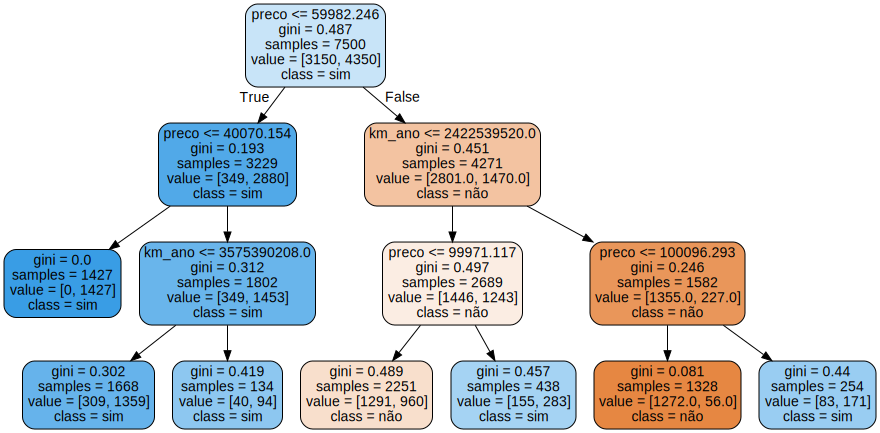

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

estrutura = export_graphviz(classificador_tree, filled=True, rounded=True, feature_names=x.columns, class_names=["não", "sim"])
grafico = graphviz.Source(estrutura)
grafico
# vai vender ou não?

In [ ]:
dados

,preco,vendido,km_ano,idade
0,30941.02,1,3508522134,26
1,40557.96,1,1262205362,28
2,89627.50,0,1144079806,20
3,95276.14,0,4316732682,11
4,117384.68,1,1277011290,12
...,...,...,...,...
9995,97112.86,0,2506064248,20
9996,107424.63,1,2131731764,24
9997,93856.99,0,2095038812,12
9998,51250.57,1,1684013376,15


# Teste

In [ ]:
dado = {
    'preco':[2500000],
    'km_ano':[7000],
    'idade':[3]
}

df=pd.DataFrame(dado)
df

,preco,km_ano,idade
0,2500000,7000,3


In [ ]:
classificador.predict(df)
# 0> não
# 1>sim

array([0])